In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
regDir= 'hor1dir2/'

In [3]:
# # I'd pick maybe two or three stars where only 3 dithers are used and try to see 
# if we can easily identify why the 4th dither isn't being used based on the image. 
# Parallel to that, I'd pick two or three of the stars with the high errors (skewing 
# towards the brighter stars as those are more important for the turnoff) that still 
# have 4 dithers being used to see why we were unable to remove bad measurements.

In [4]:
cut = np.genfromtxt('HORI_final_1812.dat',names=True)

In [31]:
cut3 = np.genfromtxt('HORI_final3_1812.dat',names=True)

In [5]:
uncut = np.genfromtxt('hor1dir2/HORI_final_1712.dat',names=True)

In [6]:
mat_psf = np.genfromtxt('elena_cats/HOROLOGIUM_CF.1.PSF.CAT',names=True)

In [7]:
c_star606 = cut['c_star_f606w']
c_star814 = cut['c_star_f814w']

mean606 = cut['mean_f606w']
mean814 = cut['mean_f814w']

std606 = cut['stdev_f606w']
std814 = cut['stdev_f814w']

flag606 = np.asarray(cut['cut_flag_f606w'],dtype=int)
flag814 = np.asarray(cut['cut_flag_f814w'],dtype=int)

In [32]:
c_star606_3 = cut3['c_star_f606w']
c_star814_3 = cut3['c_star_f814w']

mean606_3 = cut3['mean_f606w']
mean814_3 = cut3['mean_f814w']

std606_3 = cut3['stdev_f606w']
std814_3 = cut3['stdev_f814w']

flag606_3 = np.asarray(cut3['cut_flag_f606w'],dtype=int)
flag814_3 = np.asarray(cut3['cut_flag_f814w'],dtype=int)

In [8]:
std_un606 = uncut['stdev_f606w']
print('Max STD All',np.nanmax(std_un606))

Max STD All 2.06771


In [9]:
# thrD_idx = np.where( (flag606-1) < 1e-4)
# forD_idx = np.where(flag814 < 1e-4)

thrD_idx = np.where(flag606==1)
forD_idx = np.where(flag606==0)

In [33]:
thrD_idx3 = np.where(flag606_3==1)
forD_idx3 = np.where(flag606_3==0)

In [82]:
def dist(x0,x1,y0,y1):
    
    x_val = (x0-x1)**2
    y_val = (y0-y1)**2
    
    return np.sqrt(x_val + y_val)

In [83]:
idx = np.array([6,11,16,21],dtype=int)
idy = np.array([7,12,17,22],dtype=int)
means_arr = np.zeros((len(cut)))
std_arr = np.zeros((len(cut)))

means_arry = np.zeros((len(cut)))
std_arry = np.zeros((len(cut)))

dist_arr = np.zeros((6))
for dd in range(len(cut)):
#     idx = np.array([6,11,16,21],dtype=int) # columns of mags
    counter = int(6)
    arr = np.array([cut[dd][idx[0]],cut[dd][idx[1]],cut[dd][idx[2]],cut[dd][idx[3]]])
    
    arry = np.array([cut[dd][idy[0]],cut[dd][idy[1]],cut[dd][idy[2]],cut[dd][idy[3]]])
    
#     jj = 0
#     while counter > 0:
        
#         x0, x1 = arr[jj], arr[jj+1]
#         y0, y1 = arry[jj], arry[jj+1]
    
#     means_arr[dd] = np.mean(arr)
#     std_arr[dd] = np.std(arr)
    
    means_arry[dd] = np.mean(arry)
    std_arry[dd] = np.std(arry)
#     arr1 = np.array([cut[dd,idx[0]], cut[dd,idx[1]], cut[dd,idx[2]]])
#     arr2 = np.array([cut[dd,idx[3]], cut[dd,idx[1]], cut[dd,idx[2]]])
#     arr3 = np.array([cut[dd,idx[0]], cut[dd,idx[1]], cut[dd,idx[3]]])
#     arr4 = np.array([cut[dd,idx[0]], cut[dd,idx[2]], cut[dd,idx[3]]])

#     mean1 = np.mean(arr1)
#     mean2 = np.mean(arr2)
#     mean3 = np.mean(arr3)
#     mean4 = np.mean(arr4)

#     std1 = np.std(arr1)
#     std2 = np.std(arr2)
#     std3 = np.std(arr3)
#     std4 = np.std(arr4)

In [84]:
print(np.min(std_arry),np.max(std_arry))

0.007526785502503446 2.8579905304033937


In [85]:
np.sqrt(3.32**2+2.857**2)

4.380051255407864

In [86]:
4.38/20

0.219

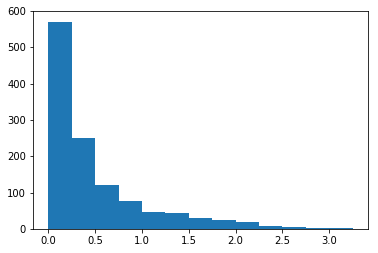

In [77]:
bins0 = np.arange(0,3.5,0.25)
plt.hist(std_arr,bins=bins0)

plt.show()

In [74]:
idx = np.array([6,11,16,21],dtype=int)
arr = np.array([cut[0][idx[0]],cut[0][idx[1]],cut[0][idx[2]],cut[0][idx[3]]])
std = np.std(arr)

print(std
# print(np.min(std),np.max(std))

0.5034780754909072


In [10]:
print('Max STD 3: ', np.max(std606[thrD_idx]))
print('Min STD 3: ', np.min(std606[thrD_idx]))
print('Max STD 4: ', np.nanmax(std606[forD_idx]))
print('Min STD 4: ', np.nanmin(std606[forD_idx]))

Max STD 3:  1.21599
Min STD 3:  0.00021
Max STD 4:  1.21082
Min STD 4:  0.00605


In [34]:
print('Max STD 3: ', np.max(std606_3[thrD_idx3]))
print('Min STD 3: ', np.min(std606_3[thrD_idx3]))

Max STD 3:  1.10613
Min STD 3:  0.00021


In [11]:
twee = np.argsort(std606[thrD_idx])
foaa = np.argsort(std606[forD_idx])

In [62]:
noop = np.argsort(std606_3[thrD_idx3])
welp = np.argsort(std606_3[forD_idx3])

In [66]:
cut3[forD_idx3[0]][165]

(43.87623, -54.09389, 11092.95, 0.945, 258.3521, 2851.8228, 311.23016, 2748.7598, 23.94947, 263.9317, 2856.3989, 313.69245, 2752.0195, 26.62717, 264.4482, 2855.9453, 312.7285, 2748.3831, 24.68699, 262.5597, 2857.79, 313.91907, 2751.8078, 26.7364, 25.50001, 1.21082, 0., 4., 43.87618, -54.09391, 561.0598, 0.041, 260.6446, 2854.3689, 313.17364, 2751.0917, 27.26687, 264.7265, 2856.803, 314.12183, 2752.2066, 27.00179, 265.8441, 2859.6892, 313.73414, 2751.8577, 26.94414, 263.1783, 2858.2891, 314.20446, 2752.0444, 27.1872, 27.1, 0.13171, 0., 4.)

In [64]:
welp

array([196,  26,  83, 116, 242,  64,  31, 122,  39,  17, 142, 221, 209,
       235, 200, 245, 182, 136, 266,  20,  67, 206, 254, 164,  21, 246,
        85,  66,  56,  34,  68, 198, 212, 213, 166, 260, 227,  22, 191,
       188, 159,  74,  91,   4, 109, 175,  98, 263, 247, 119,  37, 233,
       101, 187, 117, 192, 181,  94,  55, 228, 168, 193, 218,   7,  63,
       134, 243, 259,  84,  88,  28,  61, 146, 169, 157, 161, 154, 208,
        59,  38, 148, 211, 102,  99,  46,  45, 199, 253,  23, 120,  78,
       230,  92, 222, 127, 190,   6, 132,  36, 152, 256, 149,  53, 126,
       223, 133, 141, 186,  58,  32,  41, 244,  82, 237, 179,   0, 143,
        49, 140,  43, 123, 225,  77, 167,  96, 265,  73, 118, 255,  65,
       217, 145, 236, 112,   5, 202,   1, 156,  51,  69,  15, 194, 173,
       104, 184,  62,  87, 137, 151, 183,  50,  57, 189, 176, 114,  90,
       111, 268, 226, 262, 124,  29, 197,  40, 106,  52, 135, 220, 163,
       252,  86, 115, 250, 100,  12, 203, 180, 171,  75, 172,  3

In [12]:
cut[forD_idx[0]][66]

(43.89323, -54.10788, 2502.91, 0.96, 1271.7744, 1970.0988, 1283.5953, 1915.9884, 25.56597, 1274.5255, 1971.3945, 1283.3096, 1915.8406, 26.04959, 1276.634, 1975.8778, 1283.9849, 1917.2201, 25.69632, 1272.8481, 1972.9825, 1283.2301, 1915.8586, 26.08002, 25.84798, 0.22193, 0., 43.89319, -54.10789, 3374.594, 0.967, 1273.1189, 1971.9021, 1284.5403, 1917.5983, 25.31884, 1275.39, 1971.4227, 1283.7599, 1915.6581, 26.51139, 1281.2535, 1974.8477, 1288.0682, 1916.2612, 24.17413, 1273.411, 1973.4137, 1283.3872, 1916.014, 26.31326, 26.04783, 0.52178, 1.)

In [101]:
type(np.argsort(std606[thrD_idx])[0])

numpy.int64

In [13]:
print(cut[thrD_idx[0]][196][4])

3063.1772


In [14]:
# >>> fixed = np.ma.fix_invalid(x)
# >>> fixed.data
# array([ 1.e+00, -1.e+00,  1.e+20,  1.e+20])

In [37]:
bins = np.arange(18,28.5,0.5)

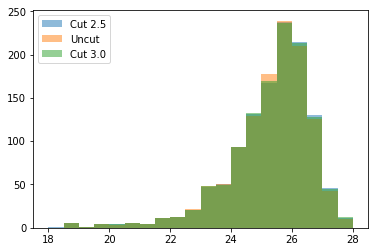

In [40]:
plt.hist(np.ma.fix_invalid(cut['mean_f606w'],fill_value=30).data,bins=bins,alpha=0.5,\
         label='Cut 2.5')
plt.hist(np.ma.fix_invalid(uncut['median_f606w'],fill_value=30).data,bins=bins,alpha=0.5,\
         label='Uncut')
plt.hist(np.ma.fix_invalid(cut3['mean_f606w'],fill_value=30).data,bins=bins,alpha=0.5,\
         label='Cut 3.0')

plt.legend()
plt.show()

In [41]:
bins2 = np.arange(0,2,0.05)

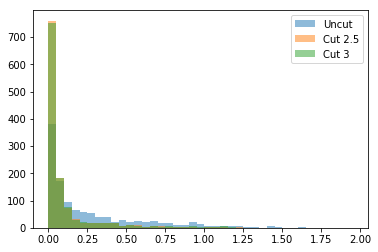

In [42]:
plt.hist(np.ma.fix_invalid(uncut['stdev_f606w'],fill_value=2.4).data,bins=bins2,alpha=0.5,\
         label='Uncut')
plt.hist(np.ma.fix_invalid(cut['stdev_f606w'],fill_value=2.4).data,bins=bins2,alpha=0.5,\
         label='Cut 2.5')
plt.hist(np.ma.fix_invalid(cut3['stdev_f606w'],fill_value=2.4).data,bins=bins2,alpha=0.5,\
         label='Cut 3')

plt.legend()
plt.show()

In [19]:
cut['mean_f606w'].size - np.count_nonzero(np.isnan(cut['mean_f606w']))

1196

In [20]:
cut['mean_f814w'].size - np.count_nonzero(np.isnan(cut['mean_f814w']))

1197

In [21]:
uncut['median_f606w'].size - np.count_nonzero(np.isnan(uncut['median_f606w']))

1196

In [22]:
def makeReg(array,array_idx,outname):
    file = open(regDir+outname+'.reg','w')
    for pp in range(len(array_idx)):
        file.write('{0} {1} {2}\n'.format(array[array_idx[pp]][4],array[array_idx[pp]][5],
                                         array[array_idx[pp]][8]))
        file.write('{0} {1} {2}\n'.format(array[array_idx[pp]][9],array[array_idx[pp]][10],
                                         array[array_idx[pp]][13]))
        file.write('{0} {1} {2}\n'.format(array[array_idx[pp]][14],array[array_idx[pp]][15],
                                         array[array_idx[pp]][18]))
        file.write('{0} {1} {2}\n'.format(array[array_idx[pp]][19],array[array_idx[pp]][20],
                                         array[array_idx[pp]][23]))
    
    file.close()
    
    return None
        

In [65]:
# makeReg(cut[thrD_idx[0]],[530,900,861],'high3std')
# makeReg(cut[thrD_idx[0]],[196,377,30],'low3std')
# makeReg(cut[forD_idx[0]],[66,107,93],'high4std')
makeReg(cut3[thrD_idx3[0]],[42,813,486],'high3std3')
makeReg(cut3[forD_idx3[0]],[107,103,113],'high4std3')

In [67]:
makeReg(cut3[forD_idx3[0]],[165],'high4std3noNan')

In [24]:
plot6 = mean606[c_star606 > 0.95]
plot8 = mean814[c_star606 > 0.95]

In [25]:
len(plot6)

758

In [26]:
len(thrD_idx[0])

1035

In [27]:
len(forD_idx[0])

164

In [28]:
1035+157

1192

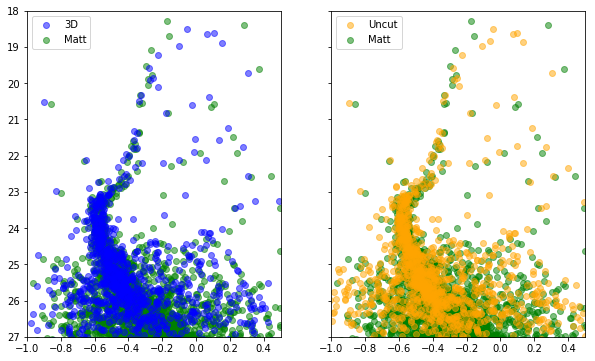

In [99]:
# fig,ax = plt.subplots(figsize=(7,9))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6),sharey=True)
ax2.scatter(uncut['median_f606w']-uncut['median_f814w'],uncut['median_f606w'],label='Uncut',color='orange',alpha=0.5)
ax1.scatter(mean606[thrD_idx]-mean814[thrD_idx],mean606[thrD_idx],color='blue',label='3D',alpha=0.5,zorder=1)
# ax.scatter(mean606_3[thrD_idx3]-mean814_3[thrD_idx3],mean606_3[thrD_idx3],color='pink',label='3D3')
# ax.scatter(mean606[forD_idx]-mean814[forD_idx],mean606[forD_idx],color='red',label='4D')

ax1.scatter(mat_psf['m606c']-mat_psf['m814c'],mat_psf['m606c'],label='Matt',color='green',alpha=0.5,zorder=0)
# ax.scatter(plot6-plot8,plot6,alpha=0.3)
ax2.scatter(mat_psf['m606c']-mat_psf['m814c'],mat_psf['m606c'],label='Matt',color='green',alpha=0.5,zorder=0)

ax1.set_ylim(27,18)
ax1.set_xlim(-1,0.5)

ax2.set_ylim(27,18)
ax2.set_xlim(-1,0.5)
ax1.legend()
ax2.legend()
plt.show()

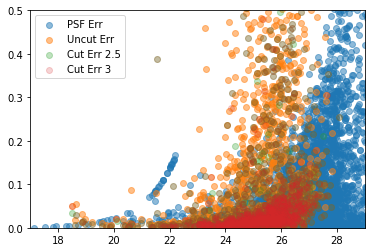

In [45]:
fig, ax = plt.subplots()

ax.scatter(mat_psf['m606c'],mat_psf['s606'],label='PSF Err',alpha=0.5)
ax.scatter(uncut['median_f606w'],uncut['stdev_f606w'],label='Uncut Err',alpha=0.5)
ax.scatter(cut['mean_f606w'],cut['stdev_f606w'],label='Cut Err 2.5',alpha=0.3)
ax.scatter(cut3['mean_f606w'],cut3['stdev_f606w'],label='Cut Err 3',alpha=0.2)


ax.legend()

ax.set_xlim(17,29)
ax.set_ylim(0,0.5)

plt.show()

# Looking at Diff Between F606W and F814W

In [46]:
thisDir = 'hor1dir3/'

In [48]:
six = np.genfromtxt(thisDir+'HOROLOGIUM-I_F606W_cut_std.dat',names=True)
ate = np.genfromtxt(thisDir+'HOROLOGIUM-I_F814W_cut_std.dat',names=True)

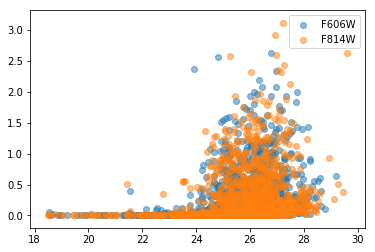

In [50]:
fig, ax = plt.subplots()

ax.scatter(six['mean'],six['stdev'],label='F606W',alpha=0.5)
ax.scatter(ate['mean'],ate['stdev'],label='F814W',alpha=0.5)

ax.legend()
plt.show()

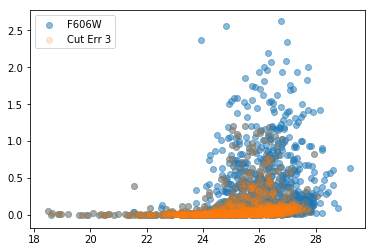

In [51]:
fig, ax = plt.subplots()

ax.scatter(six['mean'],six['stdev'],label='F606W',alpha=0.5)
ax.scatter(cut3['mean_f606w'],cut3['stdev_f606w'],label='Cut Err 3',alpha=0.2)

ax.legend()
plt.show()

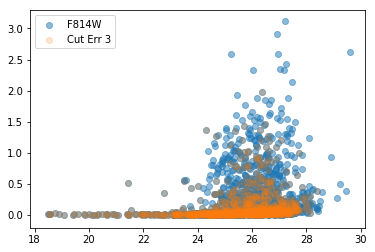

In [52]:
fig, ax = plt.subplots()

ax.scatter(ate['mean'],ate['stdev'],label='F814W',alpha=0.5)
ax.scatter(cut3['mean_f814w'],cut3['stdev_f814w'],label='Cut Err 3',alpha=0.2)

ax.legend()
plt.show()

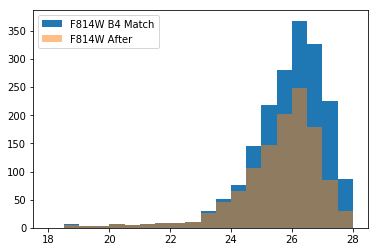

In [61]:
plt.hist(ate['mean'],bins=bins,label='F814W B4 Match')
plt.hist(cut3['mean_f814w'],bins=bins,label='F814W After',alpha=0.5)
plt.legend()
plt.show()

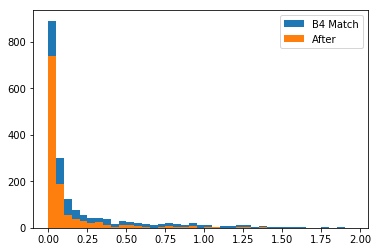

In [57]:
plt.hist(ate['stdev'],bins=bins2,label='F814W B4 Match')
plt.hist(cut3['stdev_f814w'],bins=bins2,label='F814W After')
plt.legend()
plt.show()

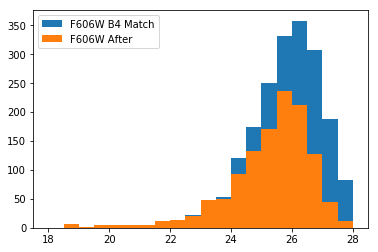

In [58]:
plt.hist(six['mean'],bins=bins,label='F606W B4 Match')
plt.hist(cut3['mean_f606w'],bins=bins,label='F606W After')
plt.legend()
plt.show()

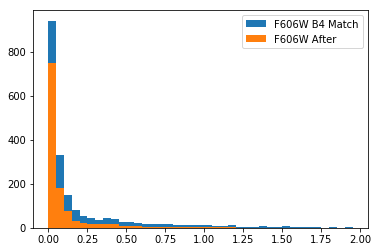

In [60]:
plt.hist(six['stdev'],bins=bins2,label='F606W B4 Match')
plt.hist(cut3['stdev_f606w'],bins=bins2,label='F606W After')
plt.legend()
plt.show()